# **10.BONUS. PRECOMPUTING FREQUENCY TENSOR**

Some data and charts in the [10. RoPE (ROTARY POSITIONAL EMBEDDINGS)](./10-ROPE-ROTARY-POSITIONAL-EMBEDDINGS.md) chapter of the documentation were generated by using this notebook.

## **10.BONUS.1. Initiating Angles of Frequency Tensor**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, to_rgb
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product


# Modified to get additional variables
# See: https://github.com/facebookresearch/llama/blob/ef351e9cd9496c579bf9f2bb036ef11bdc5ca3d2/llama/model.py#L80

def precompute_freqs_cis(dim: int, end: int, theta: float = 10000.0):
    """
    Precompute the frequency tensor for complex exponentials (cis) with given dimensions.

    This function calculates a frequency tensor with complex exponentials using the given dimension 'dim'
    and the end index 'end'. The 'theta' parameter scales the frequencies.
    The returned tensor contains complex values in complex64 data type.

    Args:
        dim (int): Dimension of the frequency tensor.
        end (int): End index for precomputing frequencies.
        theta (float, optional): Scaling factor for frequency computation. Defaults to 10000.0.

    Returns:
        torch.Tensor: Precomputed frequency tensor with complex exponentials.




    """
    vals = torch.arange(0, dim, 2)[: (dim // 2)]
    freqs = 1.0 / (theta ** (vals.float() / dim))
    backup_angles = freqs
    t = torch.arange(end, device=freqs.device)  # type: ignore
    freqs = torch.outer(t, freqs).float()  # type: ignore
    backup_freqs = freqs
    freqs_cis = torch.polar(torch.ones_like(freqs), freqs)  # complex64
    return freqs_cis, vals, backup_angles, backup_freqs


freqs_cis_orig, vals, backup_angles, backup_freqs = precompute_freqs_cis(128, 8192)
deg_angles = np.rad2deg(backup_angles)
deg_freqs = np.rad2deg(backup_freqs)

Printing the base angles of the frequency tensor

In [2]:
# This cell prints the 64 angles which are the base for the frequency tensor.
# Then I gave this list as input to ChatGPT and requested to convert it to a Markdown table existing in the documentation.

torch.set_printoptions(sci_mode=False, precision=5)
freq_zip = zip(vals, backup_angles, deg_angles)
for val, rad, deg in freq_zip:
  print(f"val: {val}, rad: {rad:.5f}, deg: {deg:.3f}")

val: 0, rad: 1.00000, deg: 57.296
val: 2, rad: 0.86596, deg: 49.616
val: 4, rad: 0.74989, deg: 42.966
val: 6, rad: 0.64938, deg: 37.207
val: 8, rad: 0.56234, deg: 32.220
val: 10, rad: 0.48697, deg: 27.901
val: 12, rad: 0.42170, deg: 24.161
val: 14, rad: 0.36517, deg: 20.923
val: 16, rad: 0.31623, deg: 18.119
val: 18, rad: 0.27384, deg: 15.690
val: 20, rad: 0.23714, deg: 13.587
val: 22, rad: 0.20535, deg: 11.766
val: 24, rad: 0.17783, deg: 10.189
val: 26, rad: 0.15399, deg: 8.823
val: 28, rad: 0.13335, deg: 7.641
val: 30, rad: 0.11548, deg: 6.616
val: 32, rad: 0.10000, deg: 5.730
val: 34, rad: 0.08660, deg: 4.962
val: 36, rad: 0.07499, deg: 4.297
val: 38, rad: 0.06494, deg: 3.721
val: 40, rad: 0.05623, deg: 3.222
val: 42, rad: 0.04870, deg: 2.790
val: 44, rad: 0.04217, deg: 2.416
val: 46, rad: 0.03652, deg: 2.092
val: 48, rad: 0.03162, deg: 1.812
val: 50, rad: 0.02738, deg: 1.569
val: 52, rad: 0.02371, deg: 1.359
val: 54, rad: 0.02054, deg: 1.177
val: 56, rad: 0.01778, deg: 1.019
val: 5

This is the output of Python + Pytorch environment. There are slight differences between them because of floating point precision differences.

In the table below, you can find approximate equivalents of radian angle values in degrees, with corresponding "val" indices:

| **val** | rad     | deg   |     | **val** | rad     | deg   |     | **val** | rad     | deg   |     | **val** | rad     | deg   |
|:-------:|--------:|------:|-----|:-------:|--------:|------:|-----|:-------:|--------:|------:|-----|:-------:|--------:|------:|
| **0**   | 1.00000 | 57.296|     | **32**  | 0.10000 | 5.730 |     | **64**  | 0.01000 | 0.573 |     | **96**  | 0.00100 | 0.057 |
| **2**   | 0.86596 | 49.616|     | **34**  | 0.08660 | 4.962 |     | **66**  | 0.00866 | 0.496 |     | **98**  | 0.00087 | 0.050 |
| **4**   | 0.74989 | 42.966|     | **36**  | 0.07499 | 4.297 |     | **68**  | 0.00750 | 0.430 |     | **100** | 0.00075 | 0.043 |
| **6**   | 0.64938 | 37.207|     | **38**  | 0.06494 | 3.721 |     | **70**  | 0.00649 | 0.372 |     | **102** | 0.00065 | 0.037 |
| **8**   | 0.56234 | 32.220|     | **40**  | 0.05623 | 3.222 |     | **72**  | 0.00562 | 0.322 |     | **104** | 0.00056 | 0.032 |
| **10**  | 0.48697 | 27.901|     | **42**  | 0.04870 | 2.790 |     | **74**  | 0.00487 | 0.279 |     | **106** | 0.00049 | 0.028 |
| **12**  | 0.42170 | 24.161|     | **44**  | 0.04217 | 2.416 |     | **76**  | 0.00422 | 0.242 |     | **108** | 0.00042 | 0.209 |
| **14**  | 0.36517 | 20.923|     | **46**  | 0.03652 | 2.092 |     | **78**  | 0.00365 | 0.209 |     | **110** | 0.00037 | 0.021 |
| **16**  | 0.31623 | 18.119|     | **48**  | 0.03162 | 1.812 |     | **80**  | 0.00316 | 0.181 |     | **112** | 0.00032 | 0.018 |
| **18**  | 0.27384 | 15.690|     | **50**  | 0.02738 | 1.569 |     | **82**  | 0.00274 | 0.157 |     | **114** | 0.00027 | 0.016 |
| **20**  | 0.23714 | 13.587|     | **52**  | 0.02371 | 1.359 |     | **84**  | 0.00237 | 0.136 |     | **116** | 0.00024 | 0.014 |
| **22**  | 0.20535 | 11.766|     | **54**  | 0.02054 | 1.177 |     | **86**  | 0.00205 | 0.118 |     | **118** | 0.00021 | 0.012 |
| **24**  | 0.17783 | 10.189|     | **56**  | 0.01778 | 1.019 |     | **88**  | 0.00178 | 0.102 |     | **120** | 0.00018 | 0.010 |
| **26**  | 0.15399 | 8.823 |     | **58**  | 0.01540 | 0.882 |     | **90**  | 0.00154 | 0.088 |     | **122** | 0.00015 | 0.009 |
| **28**  | 0.13335 | 7.641 |     | **60**  | 0.01334 | 0.764 |     | **92**  | 0.00133 | 0.076 |     | **124** | 0.00013 | 0.008 |
| **30**  | 0.11548 | 6.616 |     | **62**  | 0.01155 | 0.662 |     | **94**  | 0.00115 | 0.066 |     | **126** | 0.00012 | 0.007 |


## **10.BONUS.2. Getting Outer Product of Frequency Tensor and Position Indices**

Printing some samples from freqs_cis_orig for the documentation, angles in degrees.

In [3]:
sample_indices = [
    [0, 0], [0, 1],
    [1, 0], [1, 1], [1, 62], [1, 63],
    [2, 0], [2, 1], [2, 62], [2, 63],
    [8190, 0], [8190, 1], [8190, 62], [8190, 63],
    [8191, 0], [8191, 1], [8191, 62], [8191, 63]
  ]
sample_indices_tensor = torch.tensor(sample_indices)

sample_backup_freqs = backup_freqs[sample_indices_tensor[:, 0], sample_indices_tensor[:, 1]].tolist()
sample_deg_freqs = deg_freqs[sample_indices_tensor[:, 0], sample_indices_tensor[:, 1]].tolist()

sample_deg_freqs_normalized = [angle % 360 for angle in sample_deg_freqs]
sample_deg_freqs_normalized = [angle if angle<=180 else angle-360 for angle in sample_deg_freqs_normalized]


samples_zip = zip(sample_indices, sample_backup_freqs, sample_deg_freqs, sample_deg_freqs_normalized)

for idx, rad, deg, deg_normalized in samples_zip:
  print(f"idx: {idx}, rad: {rad:.5f}, deg: {deg:.3f}, deg_normalized: {deg_normalized:.3f}")

idx: [0, 0], rad: 0.00000, deg: 0.000, deg_normalized: 0.000
idx: [0, 1], rad: 0.00000, deg: 0.000, deg_normalized: 0.000
idx: [1, 0], rad: 1.00000, deg: 57.296, deg_normalized: 57.296
idx: [1, 1], rad: 0.86596, deg: 49.616, deg_normalized: 49.616
idx: [1, 62], rad: 0.00013, deg: 0.008, deg_normalized: 0.008
idx: [1, 63], rad: 0.00012, deg: 0.007, deg_normalized: 0.007
idx: [2, 0], rad: 2.00000, deg: 114.592, deg_normalized: 114.592
idx: [2, 1], rad: 1.73193, deg: 99.232, deg_normalized: 99.232
idx: [2, 62], rad: 0.00027, deg: 0.015, deg_normalized: 0.015
idx: [2, 63], rad: 0.00023, deg: 0.013, deg_normalized: 0.013
idx: [8190, 0], rad: 8190.00000, deg: 469252.406, deg_normalized: 172.406
idx: [8190, 1], rad: 7092.24805, deg: 406355.844, deg_normalized: -84.156
idx: [8190, 62], rad: 1.09215, deg: 62.576, deg_normalized: 62.576
idx: [8190, 63], rad: 0.94577, deg: 54.188, deg_normalized: 54.188
idx: [8191, 0], rad: 8191.00000, deg: 469309.719, deg_normalized: -130.281
idx: [8191, 1], rad

## **10.BONUS.3. Visualized Form of Some Samples from The Frequency Tensor**


Taking some samples from already calculated angles and polar coordinates, then drawing some charts from these samples. These charts are drawn to make it easy for you to compare changes between positions and dimensions.

These functions will draw different types of charts here and also save them as .svg file.

Drawing 2D charts of angles:

In [4]:
fontsize_figure_title = 36
fontsize_ax_title = 24
fontsize_tick_label = 20
fontsize_annotation = 18

def prepare_index_list(source_list):
  result = set()
  for sublist in source_list:
    row_indices = list(range(sublist[0][0], sublist[0][1]))
    col_indices = list(range(sublist[1][0], sublist[1][1]))
    result = result.union(set([tuple(pair) for pair in product(row_indices, col_indices)]))
  result = sorted(result)
  position_indices = sorted(set([sample_index[0] for sample_index in result]))
  dim_indices = sorted(set([sample_index[1] for sample_index in result]))
  return result, position_indices, dim_indices

def check_overlapping_annotation(pos, existing_pos_list, tolerance = 0.07):
  for existing_pos in existing_pos_list:
    if abs(pos[1] - existing_pos[1]) <= tolerance:
      return True
  return False

def create_fig_multiple(title):
  fig, axs = plt.subplots(4, 2, figsize=(40, 80), subplot_kw={'aspect': 'equal'})
  fig.subplots_adjust(hspace=0.1, wspace=0.35, right=0.8)

  fig.set_facecolor('#FFFFFF')
  fig.suptitle(title, fontsize=fontsize_figure_title, y=axs[0,0].get_position().y1 + 0.02, verticalalignment="bottom")
  return fig, axs

def save_fig(fig, filename_suffix):
  fig.savefig(f'chart_{filename_suffix}.svg', format='svg', bbox_inches='tight', pad_inches=0.5)

def draw_2d_chart_ax(ax, title, colormap, sample_index_ranges, xlim = (-1.05, 1.05), ylim = (-1.05, 1.05)):
  sample_indices, position_indices, dim_indices = prepare_index_list(sample_index_ranges)
  freqs_cis_pairs = [(sample_index, freqs_cis_orig[sample_index[0], sample_index[1]]) for sample_index in sample_indices]
  freqs_cis_pairs = sorted(freqs_cis_pairs, key=lambda x: np.rad2deg(np.angle(x[1])))
  colors = colormap(torch.linspace(0, 1, len(dim_indices)))

  ax.yaxis.set_major_formatter(FormatStrFormatter('%.2fj'))
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.set_facecolor('#F9F9F9')
  ax.tick_params(axis='both', labelsize=fontsize_tick_label)

  ax.axhline(0, color='black', linewidth=1.5)
  ax.axvline(0, color='black', linewidth=1.5)

  annotation_pos_list_negative = []
  annotation_pos_list_positive = []

  for sample_idx, freqs_cis_item in freqs_cis_pairs:
    position_idx, dim_idx = sample_idx
    color_idx = dim_indices.index(dim_idx)
    current_color = colors[color_idx]

    angle_rad = np.angle(freqs_cis_item)
    angle_rad_pi = angle_rad / np.pi
    angle_deg = np.rad2deg(angle_rad)

    r = freqs_cis_item.real.numpy()
    img = freqs_cis_item.imag.numpy()

    ax.plot((0, r), (0, img), color=current_color, linestyle='--')
    ax.plot((0, r), (0, img), 'o', color=current_color, markersize=5)

    annotation_text = f"dim_idx={sample_idx[1]}, dim={sample_idx[1]*2}, angle={angle_rad:.5f} rad ≈ {angle_rad_pi:.2f}π rad ≈ {angle_deg:.2f}°"
    annotation_pos = (r, img)
    offset_y = 0
    offset_sign = 1
    annotation_pos_list = annotation_pos_list_positive if annotation_pos[0] >= 0 else annotation_pos_list_negative
    if annotation_pos[0] < 0:
      annotation_pos = (max(xlim[0], annotation_pos[0] - 0.7), annotation_pos[1])
    elif annotation_pos[0] > 0:
      if xlim[0] < -0.1:
        annotation_pos = (max(0.05, annotation_pos[0] - 1), annotation_pos[1])
      else:
        annotation_pos = (max(xlim[0], annotation_pos[0] - 0.7), annotation_pos[1])

    if check_overlapping_annotation((annotation_pos[0], annotation_pos[1]), annotation_pos_list):
      while True:
        offset_y += 0.01
        if not check_overlapping_annotation((annotation_pos[0], annotation_pos[1] + offset_y), annotation_pos_list):
          offset_sign = 1
          break
        elif not check_overlapping_annotation((annotation_pos[0], annotation_pos[1] - offset_y), annotation_pos_list):
          offset_sign = -1
          break
    annotation_pos = (annotation_pos[0], annotation_pos[1] + offset_sign * offset_y)
    annotation_pos_list.append(annotation_pos)
    ax.annotate(annotation_text, annotation_pos, color=current_color, fontsize=fontsize_annotation, wrap=True)

    ax.set_xlabel('Real - cosθ', fontsize=fontsize_tick_label)
    ax.set_ylabel('Imaginary - sinθ', fontsize=fontsize_tick_label)

    ax.set_title(title, fontsize=fontsize_ax_title)
    ax.grid(True)


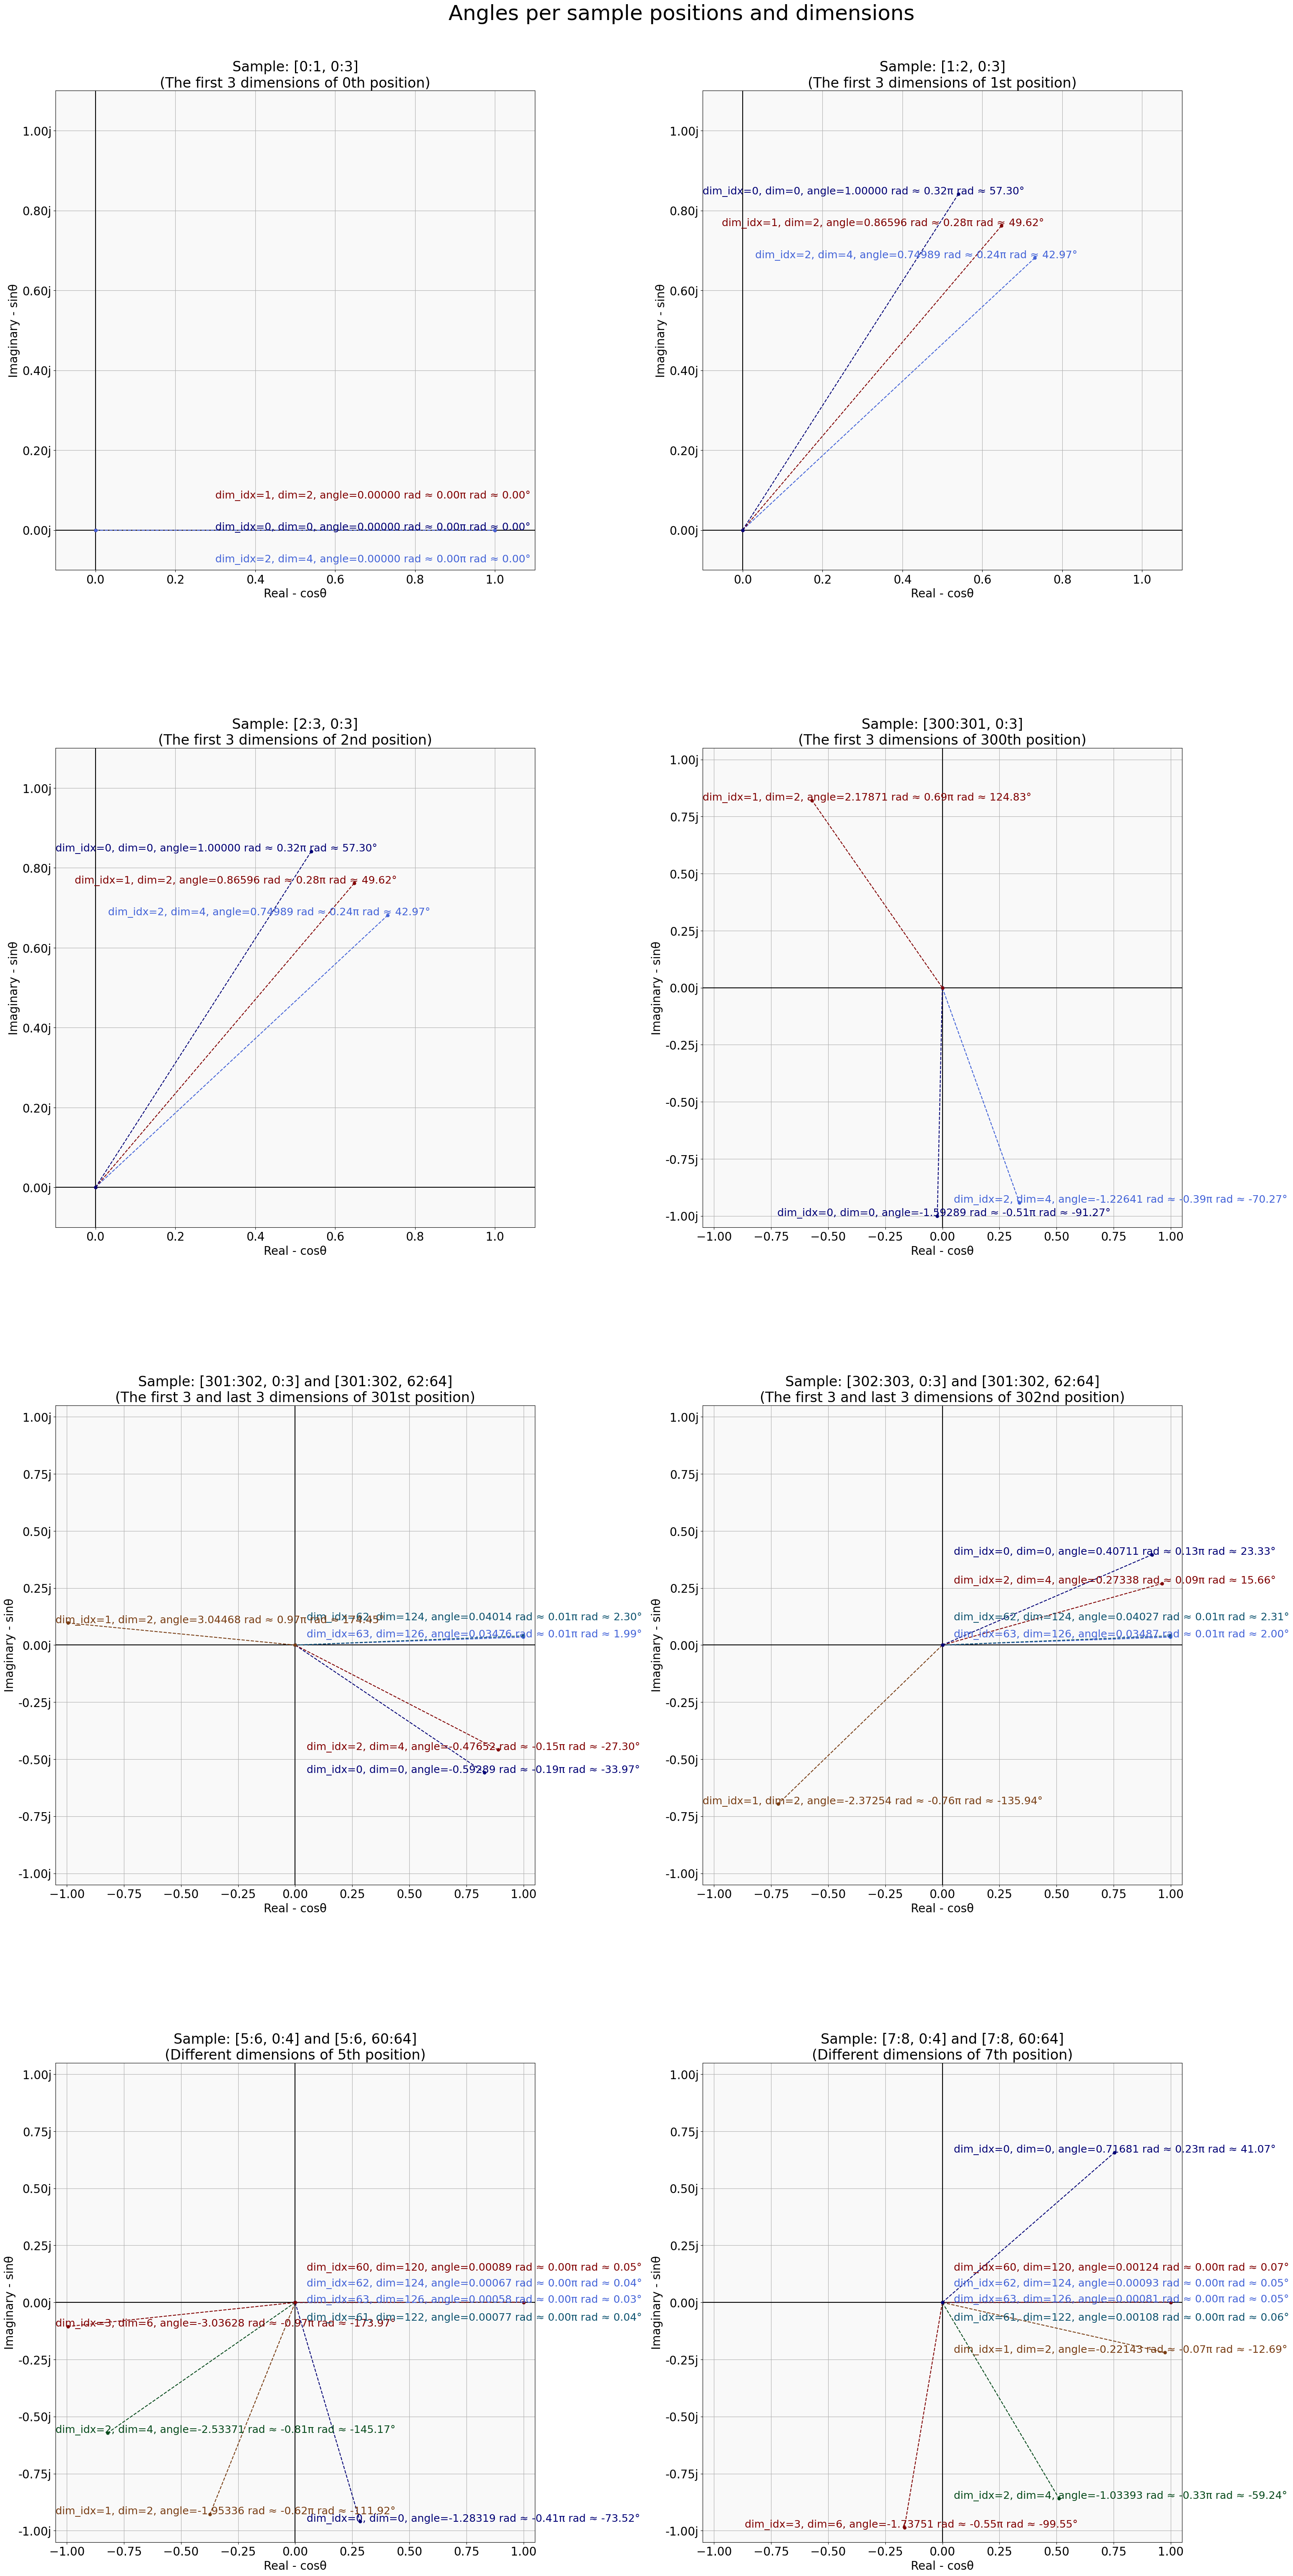

In [5]:
def draw_all_2d_charts():
  hex_colors = ['#000075', '#793D13', '#064A1B', '#800000', '#000000', '#0E536F', '#4363d8']
  rgb_colors = [to_rgb(color) for color in hex_colors]

  colormap = ListedColormap(rgb_colors)

  fig, axs = create_fig_multiple("Angles per sample positions and dimensions")

  draw_2d_chart_ax(axs[0, 0], "Sample: [0:1, 0:3]\n(The first 3 dimensions of 0th position)", colormap, [
      [(0,1), (0, 3)]
    ], xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))

  draw_2d_chart_ax(axs[0, 1], "Sample: [1:2, 0:3]\n(The first 3 dimensions of 1st position)", colormap, [
      [(1,2), (0, 3)]
    ], xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))

  draw_2d_chart_ax(axs[1, 0], "Sample: [2:3, 0:3]\n(The first 3 dimensions of 2nd position)", colormap, [
      [(1,2), (0, 3)]
    ], xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))

  draw_2d_chart_ax(axs[1, 1], "Sample: [300:301, 0:3]\n(The first 3 dimensions of 300th position)", colormap, [
      [(300,301), (0, 3)]
    ])

  draw_2d_chart_ax(axs[2, 0], "Sample: [301:302, 0:3] and [301:302, 62:64]\n(The first 3 and last 3 dimensions of 301st position)", colormap, [
      [(301,302), (0, 3)],
      [(301,302), (62, 64)],
    ])

  draw_2d_chart_ax(axs[2, 1], "Sample: [302:303, 0:3] and [301:302, 62:64]\n(The first 3 and last 3 dimensions of 302nd position)", colormap, [
      [(302,303), (0, 3)],
      [(302,303), (62, 64)],
    ])

  draw_2d_chart_ax(axs[3, 0], "Sample: [5:6, 0:4] and [5:6, 60:64]\n(Different dimensions of 5th position)", colormap, [
      [(5,6), (0, 4)],
      [(5,6), (60, 64)],
    ])

  draw_2d_chart_ax(axs[3, 1], "Sample: [7:8, 0:4] and [7:8, 60:64]\n(Different dimensions of 7th position)", colormap, [
      [(7,8), (0, 4)],
      [(7,8), (60, 64)],
    ])

  save_fig(fig, "angles_2d")
  plt.show()


draw_all_2d_charts()

Drawing 3D charts of polar coordinates:

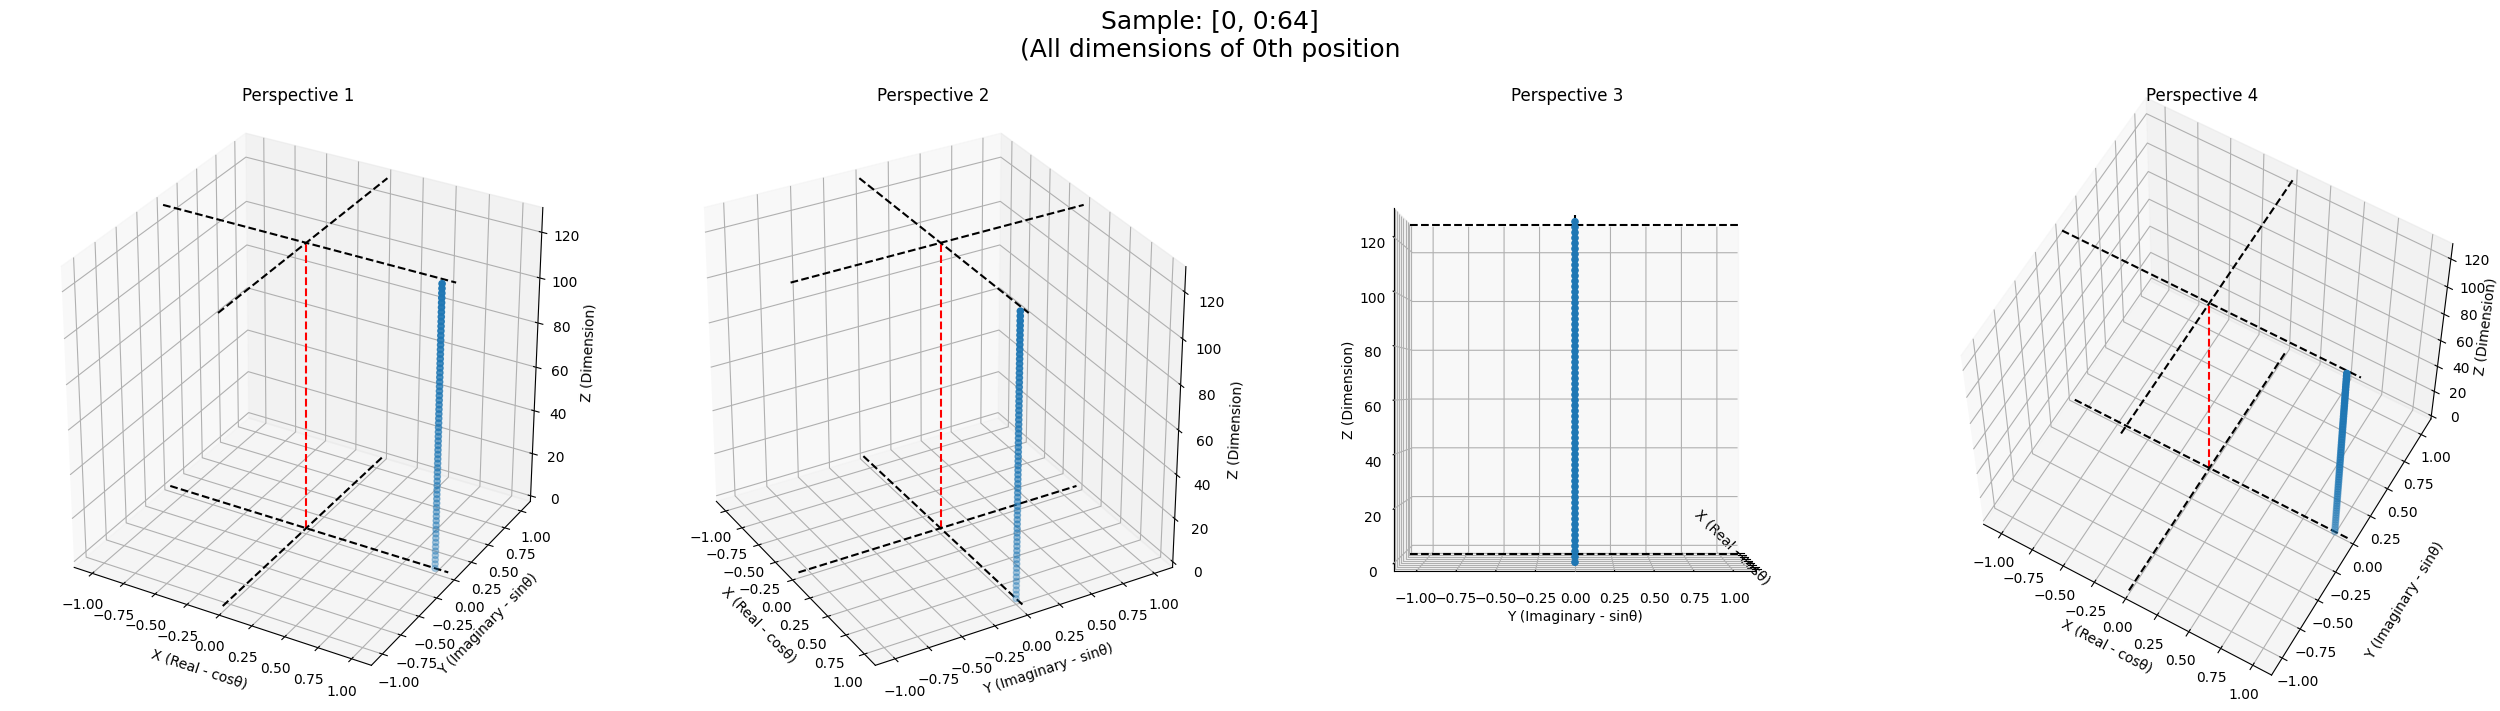

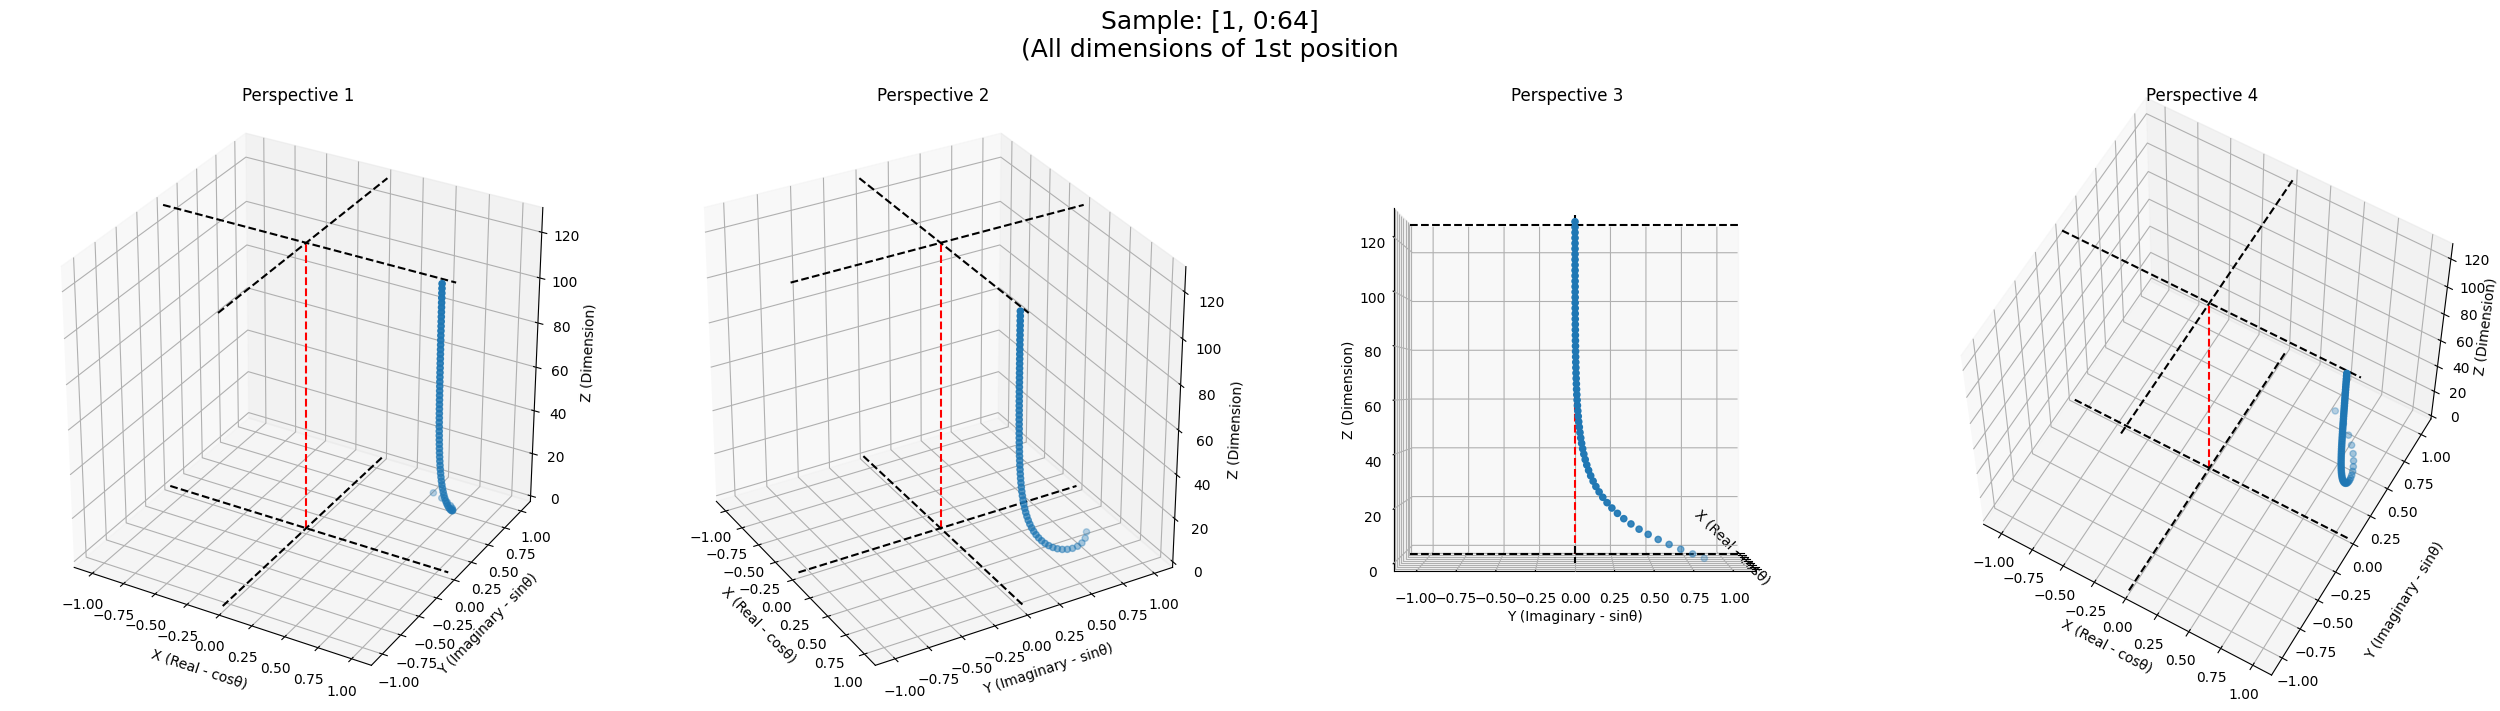

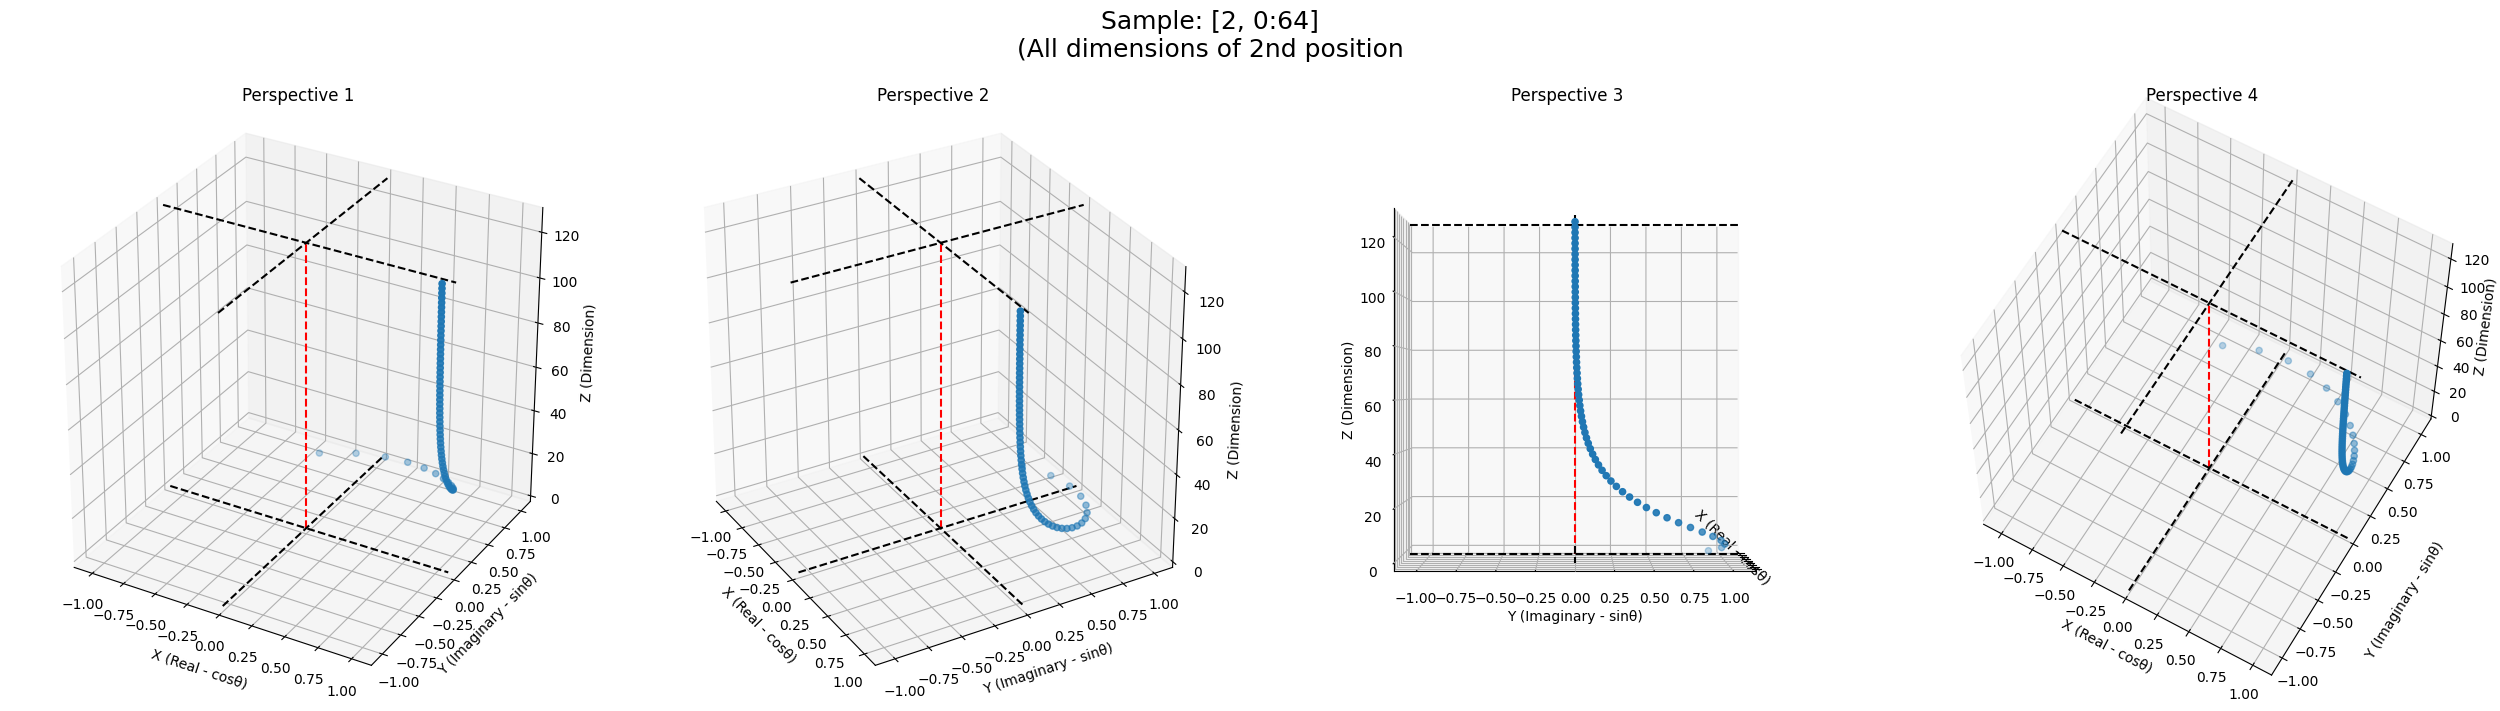

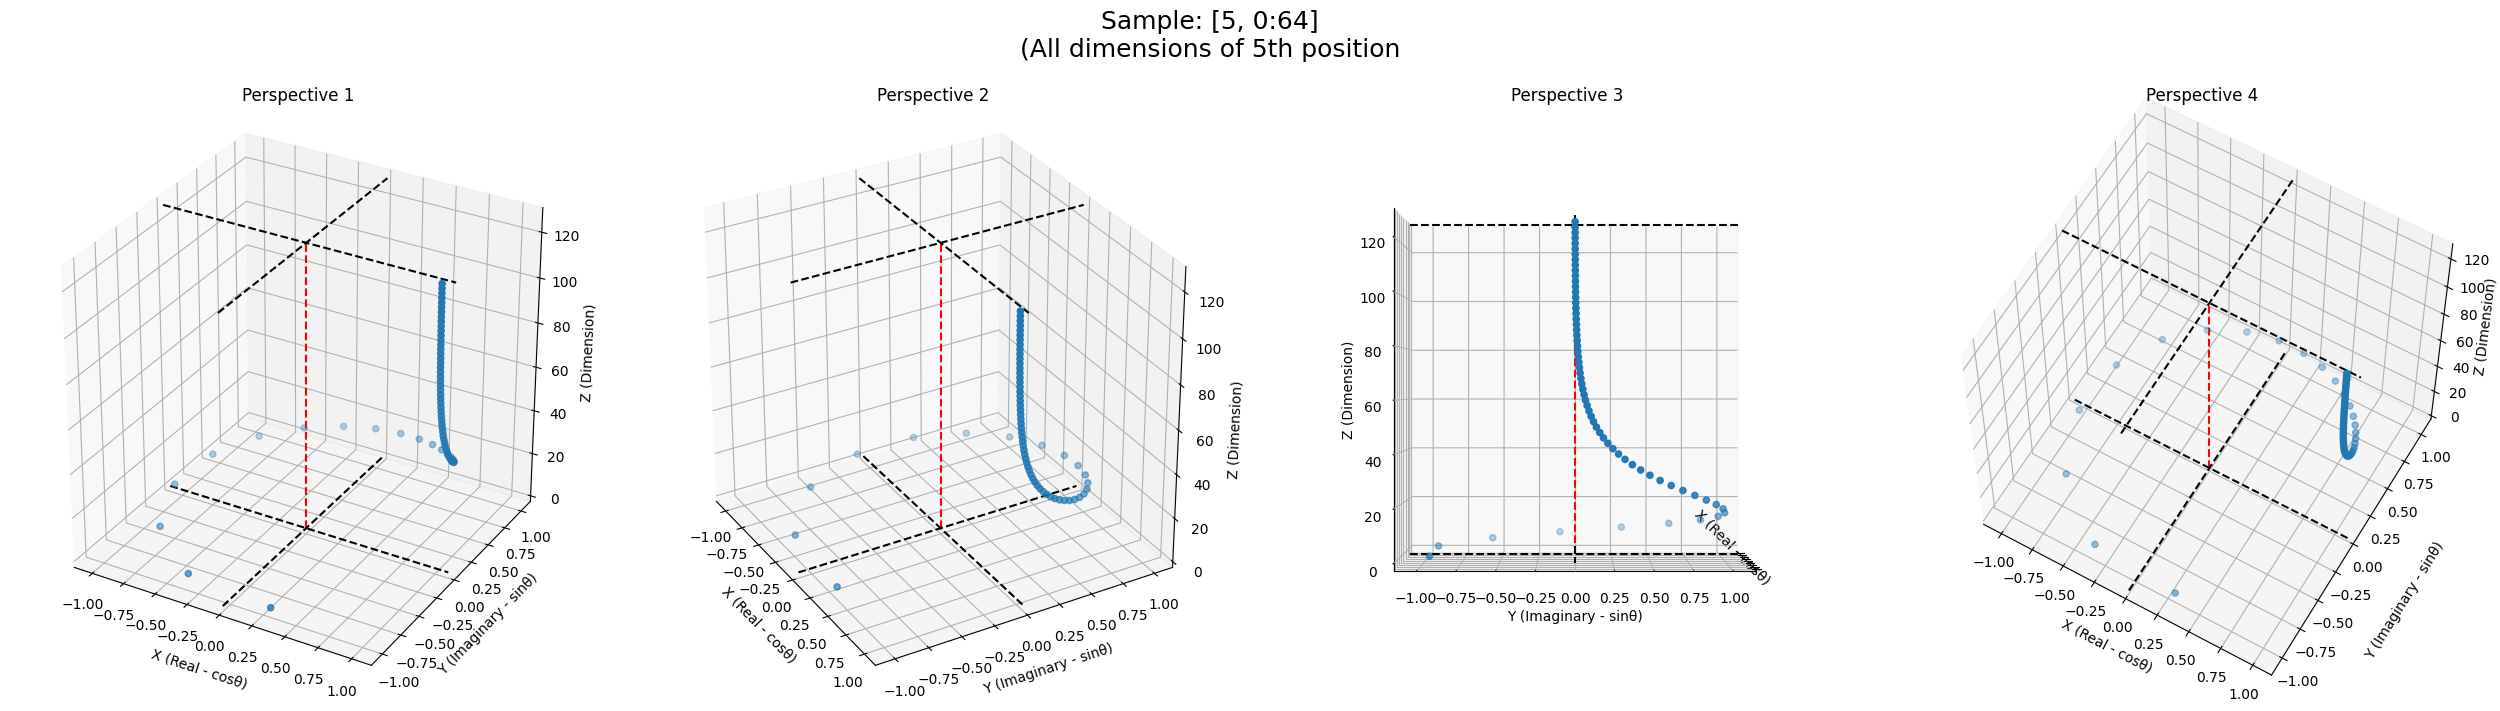

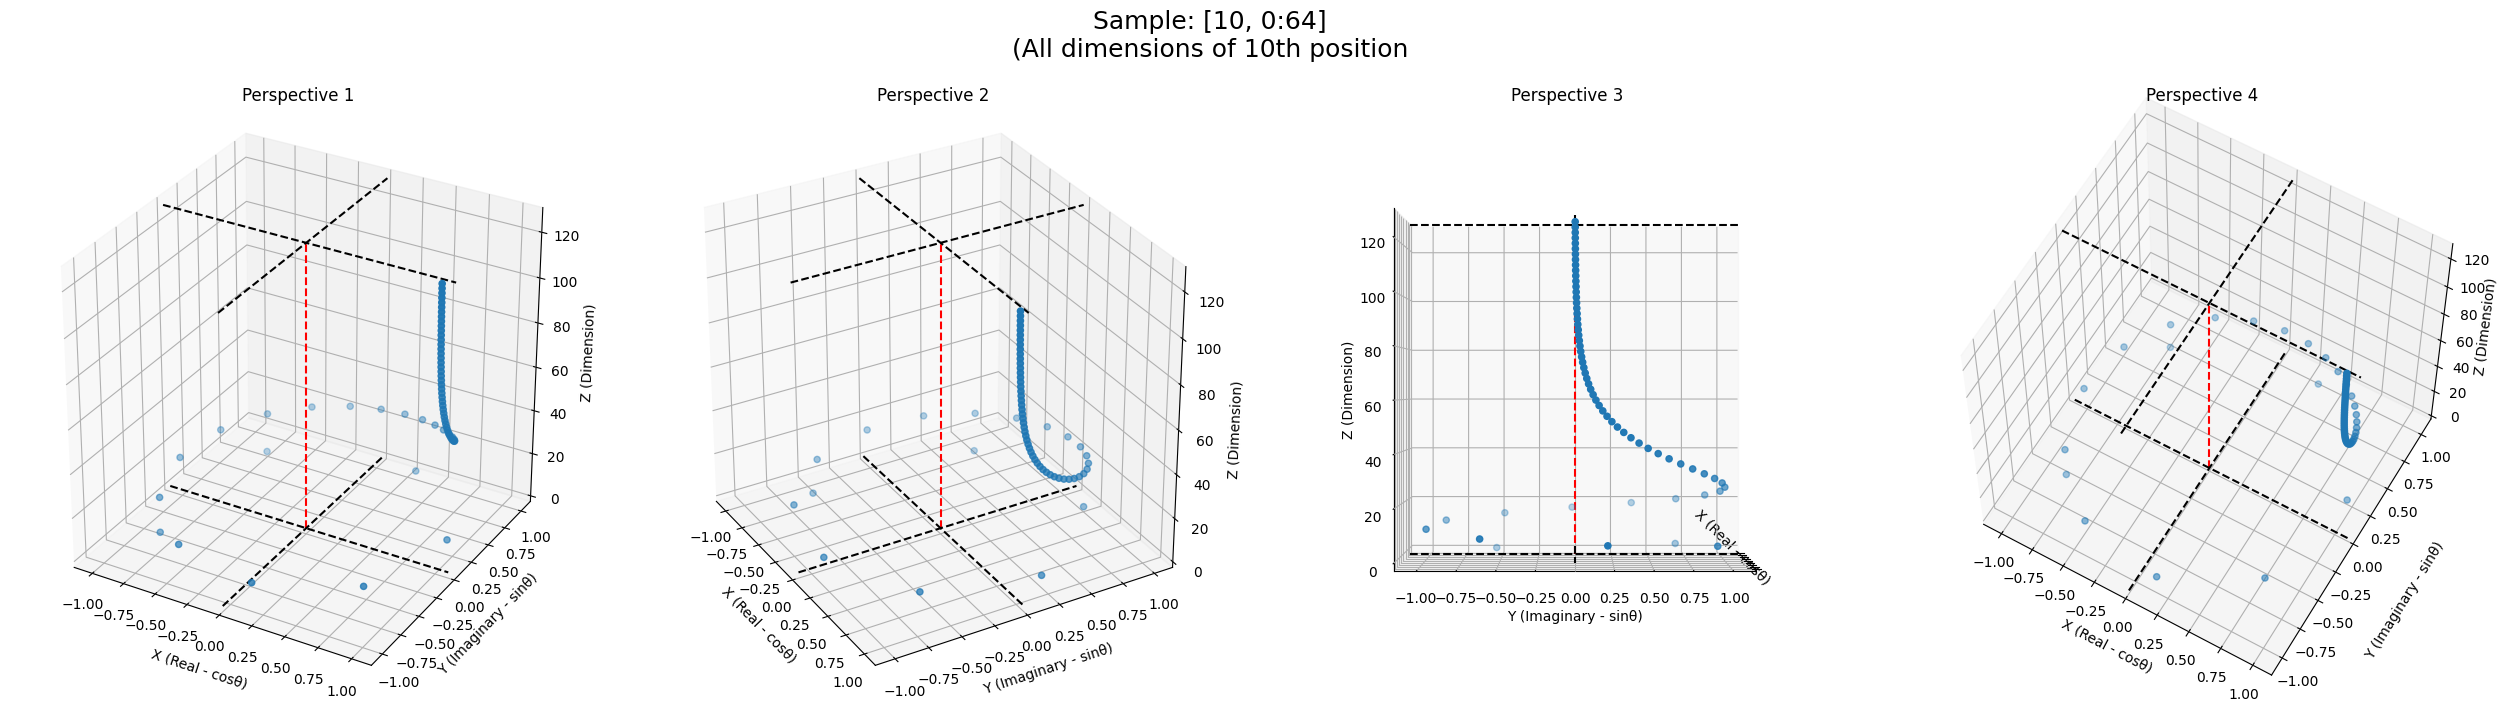

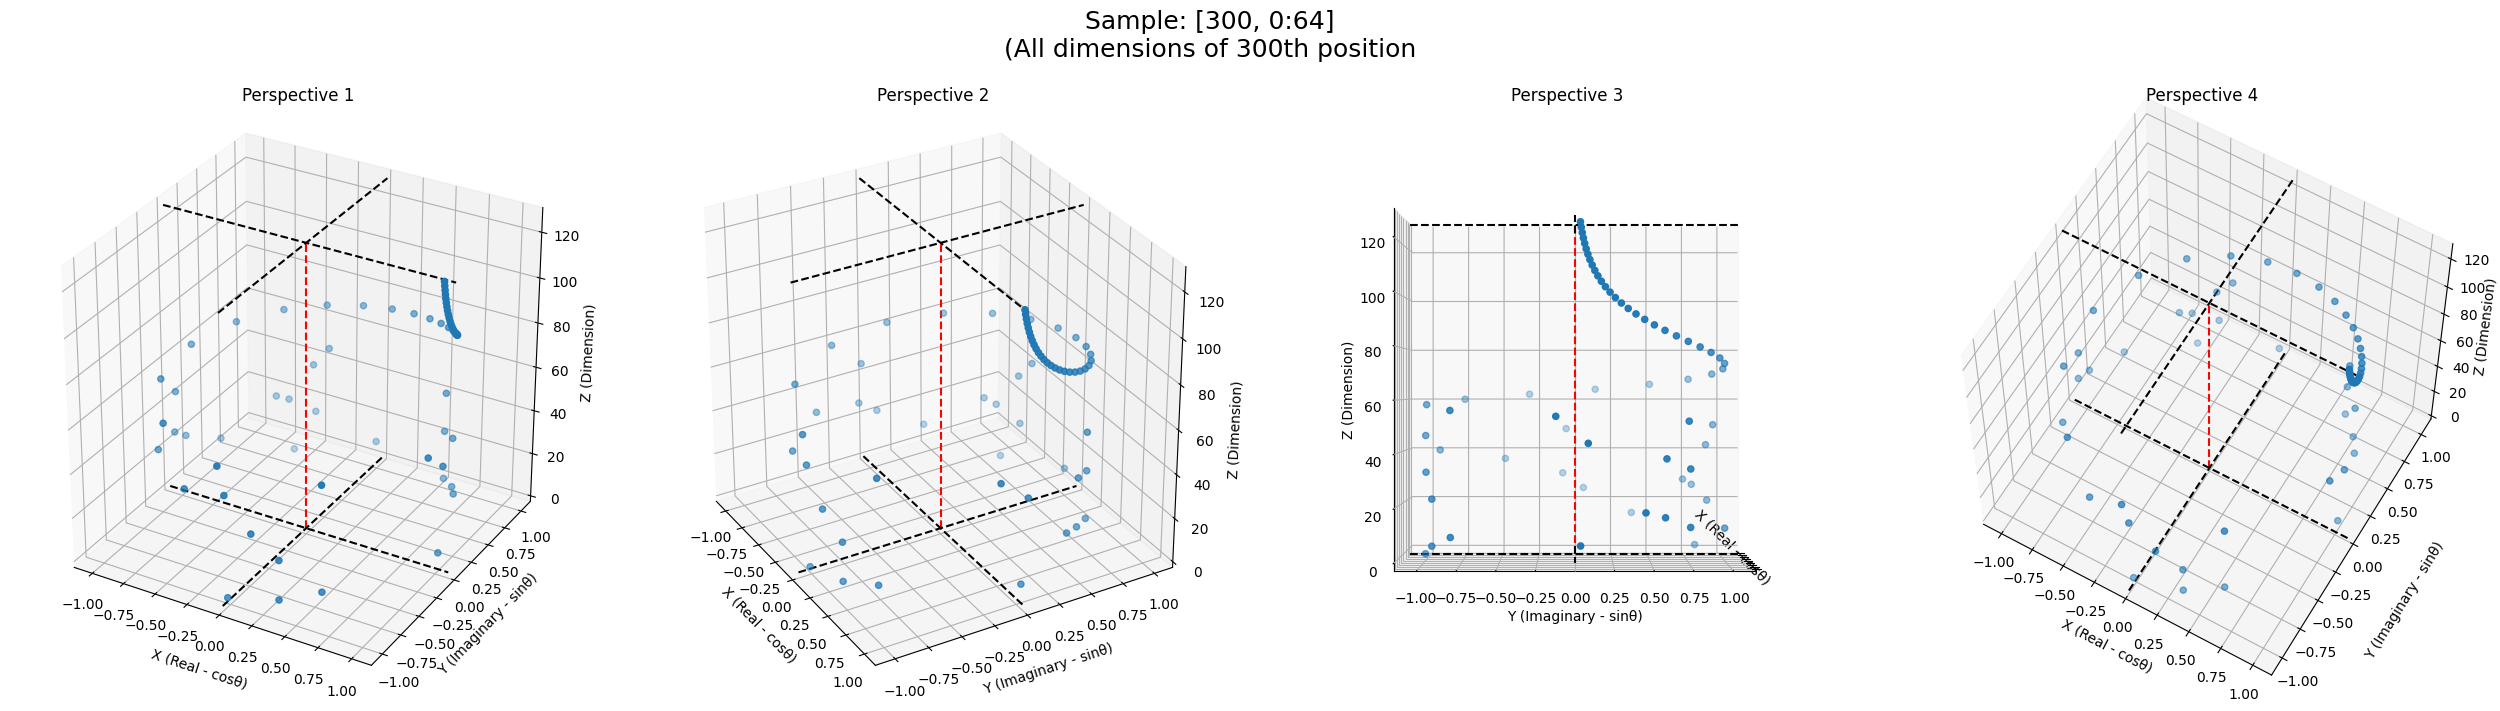

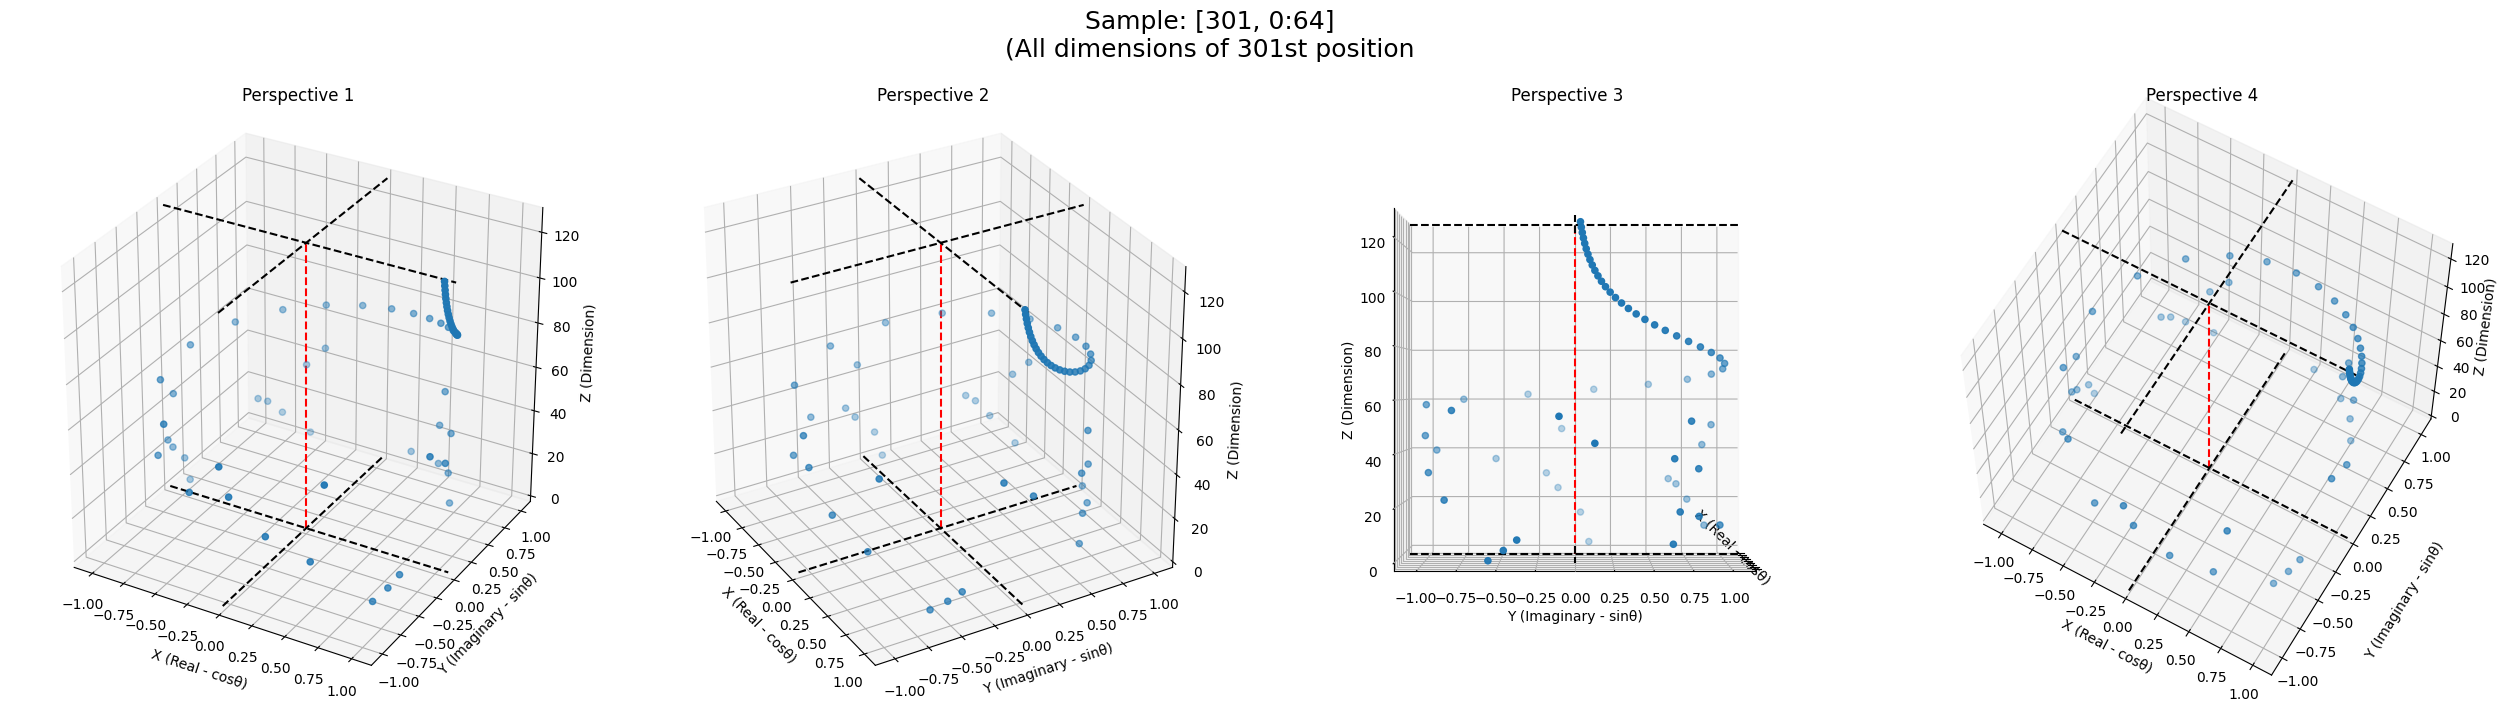

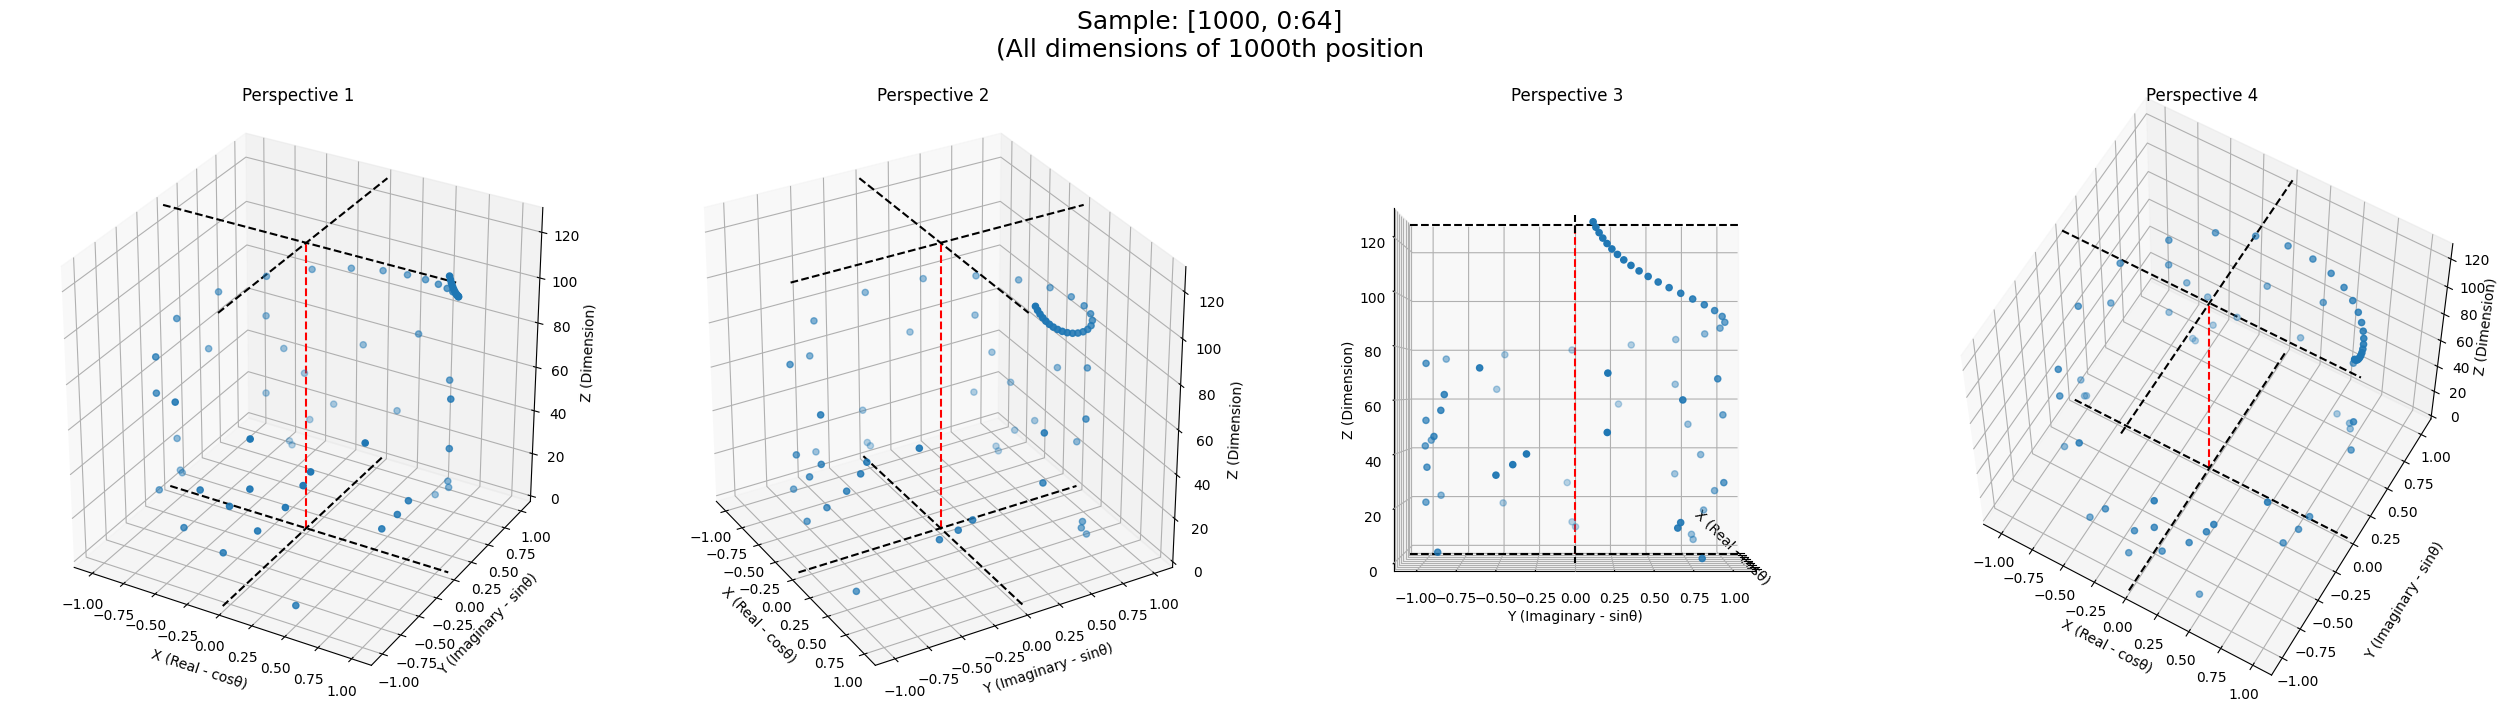

In [6]:
fontsize_figure_title = 18
fontsize_ax_title = 12

def create_3d_fig_multiple(title):
  fig, axs = plt.subplots(1, 4, figsize=(32, 8), subplot_kw={'aspect': 'equal', 'projection': '3d'})
  fig.subplots_adjust(hspace=0.3, wspace=0.1)

  fig.set_facecolor('#FFFFFF')
  fig.suptitle(title, fontsize=fontsize_figure_title)
  return fig, axs

def draw_3d_chart_ax(ax, title, freqs_cis_range, view_init_kwargs=None):
  x = np.real(freqs_cis_range)
  y = np.imag(freqs_cis_range)
  z = vals[0:128]

  xlim = (-1.1, 1.1)
  ylim = (-1.1, 1.1)
  zlim = (0, 128)

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.set_zlim(zlim)

  ax.plot([0, 0], [0, 0], zlim, color='red', linestyle='--')  # x-axis line
  ax.plot([0, 0], ylim, [0, 0], color='black', linestyle='--')  # y-axis line
  ax.plot(xlim, [0, 0], [0, 0], color='black', linestyle='--')  # z-axis line
  ax.plot(xlim, [0, 0], (zlim[1], zlim[1]), color='black', linestyle='--')  # z-axis, lines to roof
  ax.plot([0, 0], ylim, (zlim[1], zlim[1]), color='black', linestyle='--')  # z-axis, lines to roof

  # Change perspective
  if view_init_kwargs is not None:
    ax.view_init(**view_init_kwargs)


  ax.scatter(x, y, z)

  ax.set_xlabel('X (Real - cosθ)')
  ax.set_ylabel('Y (Imaginary - sinθ)')
  ax.set_zlabel('Z (Dimension)')
  ax.set_title(title, fontsize=fontsize_ax_title)

def draw_3d_chart_fig(filename_suffix, title, freqs_cis_range):
  fig, axs = create_3d_fig_multiple(title)
  draw_3d_chart_ax(axs[0], "Perspective 1", freqs_cis_range, None)
  draw_3d_chart_ax(axs[1], "Perspective 2", freqs_cis_range, {'elev':30, 'azim':-30})
  draw_3d_chart_ax(axs[2], "Perspective 3", freqs_cis_range, {'elev':0, 'azim':0})
  axs[2].xaxis.set_ticklabels([])
  axs[2].xaxis.labelpad = -30


  draw_3d_chart_ax(axs[3], "Perspective 4", freqs_cis_range, {'elev':60, 'azim':-60})
  axs[3].yaxis.labelpad = 20
  axs[3].zaxis.labelpad = 0

  save_fig(fig, filename_suffix)
  plt.show()

def draw_all_3d_charts():
  draw_3d_chart_fig("polar_coordinates_3d_pos_0", "Sample: [0, 0:64]\n(All dimensions of 0th position", freqs_cis_orig[0, 0:64])
  draw_3d_chart_fig("polar_coordinates_3d_pos_1", "Sample: [1, 0:64]\n(All dimensions of 1st position", freqs_cis_orig[1, 0:64])
  draw_3d_chart_fig("polar_coordinates_3d_pos_2", "Sample: [2, 0:64]\n(All dimensions of 2nd position", freqs_cis_orig[2, 0:64])
  draw_3d_chart_fig("polar_coordinates_3d_pos_5", "Sample: [5, 0:64]\n(All dimensions of 5th position", freqs_cis_orig[5, 0:64])
  draw_3d_chart_fig("polar_coordinates_3d_pos_10", "Sample: [10, 0:64]\n(All dimensions of 10th position", freqs_cis_orig[10, 0:64])
  draw_3d_chart_fig("polar_coordinates_3d_pos_300", "Sample: [300, 0:64]\n(All dimensions of 300th position", freqs_cis_orig[300, 0:64])
  draw_3d_chart_fig("polar_coordinates_3d_pos_301", "Sample: [301, 0:64]\n(All dimensions of 301st position", freqs_cis_orig[301, 0:64])
  draw_3d_chart_fig("polar_coordinates_3d_pos_1000", "Sample: [1000, 0:64]\n(All dimensions of 1000th position", freqs_cis_orig[1000, 0:64])

draw_all_3d_charts()